<a href="https://colab.research.google.com/github/RoadoneP/Machine_learning/blob/main/Minist/Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
df_train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Mnist/mnist_train.csv")
df_test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Mnist/mnist_test.csv")
df_train

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,1x11,1x12,1x13,1x14,1x15,1x16,1x17,1x18,1x19,1x20,1x21,1x22,1x23,1x24,1x25,1x26,1x27,1x28,2x1,2x2,2x3,2x4,2x5,2x6,2x7,2x8,2x9,2x10,2x11,...,27x17,27x18,27x19,27x20,27x21,27x22,27x23,27x24,27x25,27x26,27x27,27x28,28x1,28x2,28x3,28x4,28x5,28x6,28x7,28x8,28x9,28x10,28x11,28x12,28x13,28x14,28x15,28x16,28x17,28x18,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,147,252,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [40]:
X_t = df_train.drop(["label"], axis=1)
Y_t = df_train.label.values
X_test = df_test.drop(["label"], axis=1)
Y_test = df_test.label.values

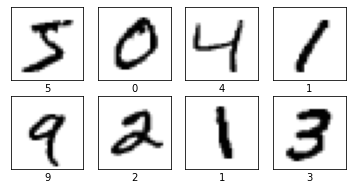

In [37]:
plt.figure(figsize=(6,3))
X = X_t.to_numpy().reshape(60000,28,28) #가로세로
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False) #격자
    plt.imshow(X[i], cmap=plt.cm.binary)
    plt.xlabel(str(Y_t[i]))
plt.show()
#grayscale=1 (60000,28,28,1(3이면 rgb))

In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(X_t,Y_t,test_size=0.2,stratify = Y_t, random_state = 30)

In [ ]:
Y_train.shape #60000개중에서 0.8만큼(1-test_size)인 48000개

(48000,)

In [ ]:
num_classes = 10 #0~9까지의 수
#Normalization
X_train= X_train/255. #rgb가 0~255까지 있기 때문에
X_val = X_val/255.
X_test = X_test/255.

#Y - vectorization
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_val= keras.utils.to_categorical(Y_val, num_classes)
Y_test= keras.utils.to_categorical(Y_test, num_classes)

In [ ]:
col = 28
row = 28
input_shape = (col,row, 1)

In [ ]:
X_train = X_train.to_numpy().reshape(48000, 28, 28, 1)
X_test = X_test.to_numpy().reshape(10000, 28, 28, 1)
X_val = X_val.to_numpy().reshape(12000, 28, 28, 1)

In [ ]:
X_test.shape

(10000, 28, 28, 1)

In [ ]:
model = Sequential([
    Flatten(input_shape=input_shape),
    Dense(128, activation='relu'),
    Dense(10,activation='softmax'),
])

model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])

In [ ]:
model.fit(X_train, Y_train, batch_size=32, epochs=20, verbose=1, validation_data=(X_val, Y_val))

Epoch 1/20
1500/1500 [==============================] - 4s 2ms/step - loss: 2.3467 - accuracy: 0.1015 - val_loss: 2.2491 - val_accuracy: 0.1516
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 2.2207 - accuracy: 0.1758 - val_loss: 2.1347 - val_accuracy: 0.2635
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 2.1098 - accuracy: 0.2975 - val_loss: 2.0270 - val_accuracy: 0.4152
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 1.9995 - accuracy: 0.4469 - val_loss: 1.9223 - val_accuracy: 0.5251
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 1.8985 - accuracy: 0.5444 - val_loss: 1.8201 - val_accuracy: 0.5900
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 1.7955 - accuracy: 0.6038 - val_loss: 1.7200 - val_accuracy: 0.6367
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 1.6953 - accuracy: 0.6461 - val_loss: 1.6223 - val_accuracy:

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss', score[0])
print('Test accuracy',score[1])

Test loss 0.809360682964325
Test accuracy 0.8328999876976013
